### Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

 

#### Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

 

#### Project Task: Week 1

Exploratory Data Analysis:

    Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

    Determine the number of samples present in the data, unique elements in all the features. 

    Check if there is any null value in any features. 

Correlation of features and feature selection:

    Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

 

#### Project Task: Week 2

Building Classification Model

    Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

    Build classification models using a binary classifier to detect malicious or phishing URLs.

    Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

    Validate the accuracy of data by the K-Fold cross-validation technique.

    The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.


# **Code**

### EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
raw_data = pd.read_csv("dataset.csv") 

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Shows that for the 31 variables, there are no NaN values.

In [ ]:
raw_data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


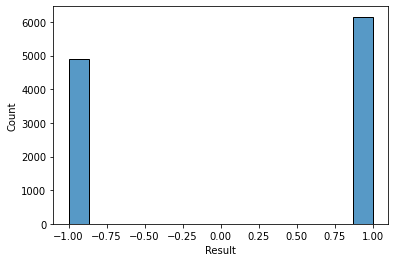

In [ ]:
x = raw_data.iloc[:, :-1] #all rows
y = raw_data.iloc[:, -1] #last column

#histogram
sns.histplot(y)
plt.show()

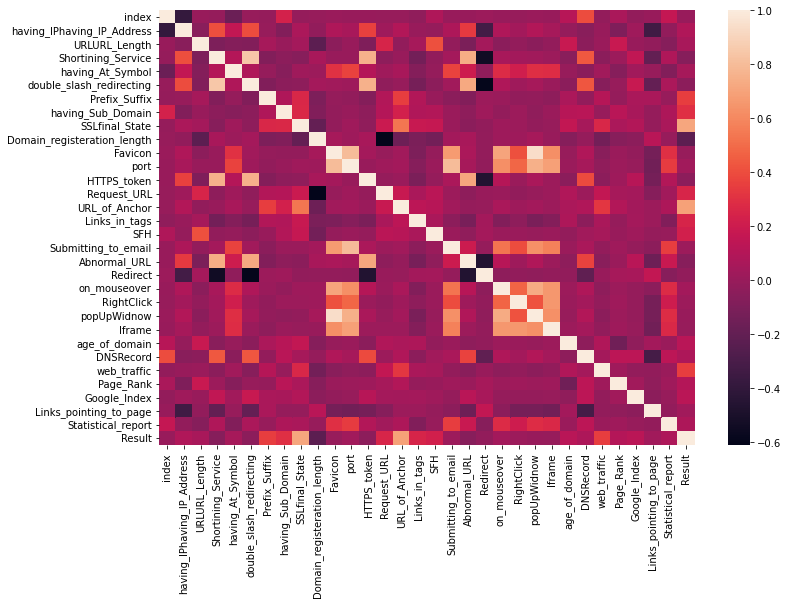

In [ ]:
%matplotlib inline

#heatmap of correlated variables:
corr = raw_data.corr()
plt.figure(figsize = (12,8)) #wanted to make it bigger for easier visualization
sns.heatmap(corr)
plt.show()

We see that a couple are highly correlated, like *popUpWidnow* and *Favicon*

In [ ]:
#removing correlated columns from the dataset:

data1 = raw_data.drop(['popUpWidnow','Favicon'], axis = 'columns', inplace = True)


### Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

print(metrics.classification_report(y_pred, y_test))

print("\n\nAccuracy Score:", metrics.accuracy_score(y_test, y_pred).round(2)*100, "%")

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94      1234
           1       0.96      0.95      0.95      1530

    accuracy                           0.95      2764
   macro avg       0.95      0.95      0.95      2764
weighted avg       0.95      0.95      0.95      2764



Accuracy Score: 95.0 %


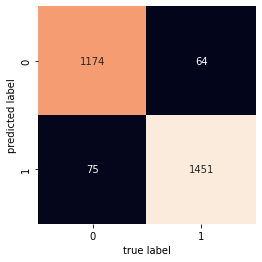

In [ ]:
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')

plt.ylabel('predicted label');

#plt.savefig(confusion_matrix_file)

True positives:1452
True negatives:1174
Fals positives (type 1 errors):63
True negatives (type 2 errors):75

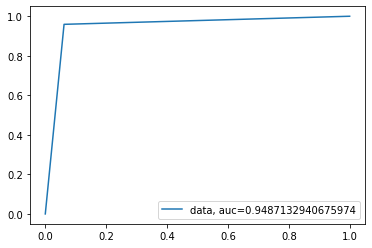

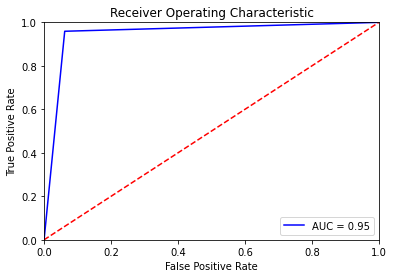

In [ ]:
#Area Under Curve (AUC) and Receiver Operating Characteristics (ROC):
'''In statistics, a receiver operating characteristic curve, i.e. ROC curve,
is a graphical plot that illustrates the diagnostic ability of a binary classifier
system as its discrimination threshold is varied. (wiki)
'''

probs = model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-Fold Cross Validation:
fxns courtesy of Michel Kana via Medium: https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6  

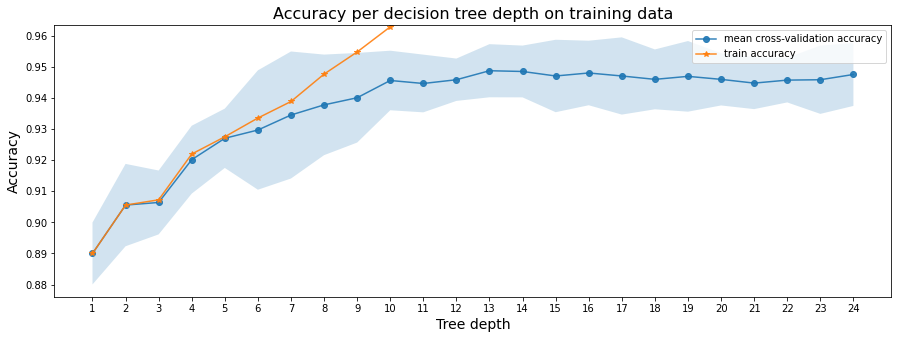

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(x, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, x, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(x, y).score(x, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-13 tree achieves the best mean cross-validation accuracy 94.87393 +/- 0.42682% on training dataset


In [ ]:
# function for training and evaluating a tree
def run_single_tree(x_train, y_train, x_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train)
    accuracy_train = model.score(x_train, y_train)
    accuracy_test = model.score(x_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(x_train, y_train, 
                                                                          x_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  13
Accuracy, Training Set:  98.32348 %
Accuracy, Test Set:  95.29667 %


In [50]:
%%shell
jupyter nbconvert --to html ///content/McMillen_PGAIML_Capstone_Cybersecurity.ipynb

[NbConvertApp] WARNING | pattern '///content/McMillen_PGAIML_Capstone_Cybersecurity.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jup

CalledProcessError: ignored